In [537]:
import numpy as np
import numpy.random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [538]:
# data
state_pop = np.loadtxt('datasets/FDSI_Final_Proj_Data/statePopulations.csv', delimiter=',')
poll_quality = np.loadtxt('datasets/FDSI_Final_Proj_Data/poll_quality.csv', delimiter=',')
state_polls = np.loadtxt('datasets/FDSI_Final_Proj_Data/state_polls.csv', delimiter=',')

In [555]:
# simulation time!
num_simulations = 10000
rnd.seed(42)

# arrays to store results
electoral_votes_results = np.zeros(num_simulations)
popular_votes_results = np.zeros(num_simulations)
pop_vote_threshold = np.zeros(num_simulations)
num_Barnes_wins_pop = 0
num_Barnes_wins_EC = 0

for sims in range(num_simulations) :

    # reset the vote count for each simulation
    rand_EC_votes_for_Barnes = 0
    rand_pop_votes_for_Barnes = 0
    
    # calculate how many people show up to vote
    n_states = len(state_pop)
    voter_turnout = np.zeros(n_states)
    for turnout in range(n_states) :
        voter_turnout[turnout] = rnd.binomial(p=0.6, n=state_pop[turnout])
    
    # compute the average poll value for each state weighted by poll quality
    n_polls = len(poll_quality)
    rand_weighted_polls = np.zeros(n_states)
    adjusted_state_polls = state_polls/2000
    for states in range(n_states) :
        for polls in range(n_polls) :
                rand_state_polls[states][polls] = rnd.binomial(p=adjusted_state_polls[states][polls], n=2000)
    for weight in range(n_states):
        rand_weighted_polls[weight] = np.average(rand_state_polls[weight,:], weights=poll_quality)
    
    # compute predicted votes for each state based on weighted poll average
    rand_pred_vote_by_state = rand_weighted_polls/100 * voter_turnout

    # compute which states were won and award electoral college votes
    ppl_per_EC_vote = 1000 # given in the problem
    EC_votes_by_state = state_pop/ppl_per_EC_vote
    EC_vote_threshold = sum(EC_votes_by_state)/2
    rand_Barnes_won = rand_pred_vote_by_state > voter_turnout/2
    rand_EC_votes_for_Barnes = np.sum(EC_votes_by_state[rand_Barnes_won])
    if rand_EC_votes_for_Barnes > (np.sum(EC_votes_by_state)/2):
        num_Barnes_wins_EC = num_Barnes_wins_EC + 1
    
    # compute popular vote results
    pop_vote_threshold[sims] = np.sum(voter_turnout) / 2
    rand_pop_votes_for_Barnes = np.sum(rand_pred_vote_by_state)
    if rand_pop_votes_for_Barnes > (np.sum(voter_turnout)/2):
        num_Barnes_wins_pop = num_Barnes_wins_pop + 1
    
    # storing the results of the current simulation
    electoral_votes_results[sims] = rand_EC_votes_for_Barnes
    popular_votes_results[sims] = rand_pop_votes_for_Barnes
average_pop_vote_threshold = np.sum(pop_vote_threshold) / num_simulations

In [624]:
print(f'Barnes has a {num_Barnes_wins_pop / 100}% chance of winning the popular vote')
print(f'Barnes has a {num_Barnes_wins_EC / 100}% chance of winning the electoral college')
print(f'Therefore, Barnes has a {num_Barnes_wins_EC / 100}% chance of winning the election overall!')

Barnes has a 38.57% chance of winning the popular vote
Barnes has a 37.29% chance of winning the electoral college
Therefore, Barnes has a 37.29% chance of winning the election overall!


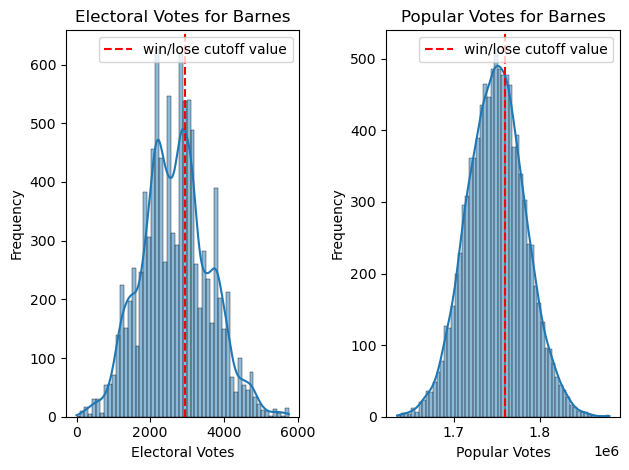

In [558]:
# plot the results

# electoral votes
plt.subplot(1, 2, 1)
sns.histplot(electoral_votes_results, kde=True)
plt.title('Electoral Votes for Barnes')
plt.xlabel('Electoral Votes')
plt.ylabel('Frequency')
plt.axvline(x=EC_vote_threshold, color='r', linestyle='--', label='win/lose cutoff value')
plt.legend()

# popular votes
plt.subplot(1, 2, 2)
sns.histplot(popular_votes_results, kde=True)
plt.title('Popular Votes for Barnes')
plt.xlabel('Popular Votes')
plt.ylabel('Frequency')
plt.axvline(x=average_pop_vote_threshold, color='r', linestyle='--', label='win/lose cutoff value')
plt.legend()

plt.tight_layout()
plt.show()

In [610]:
def hist_data(data, n_bins) :
    """
    Computes the histogram counts, bin centers, and bin_widths
    from the data and number of bins
    """
    counts, bins = np.histogram(data, bins = n_bins) 
    bin_width = bins[1] - bins[0]               
    bin_centers = bins[:-1] + bin_width/2
    return counts, bin_centers, bin_width

The overall probability of Barnes winning the election is 37.29%


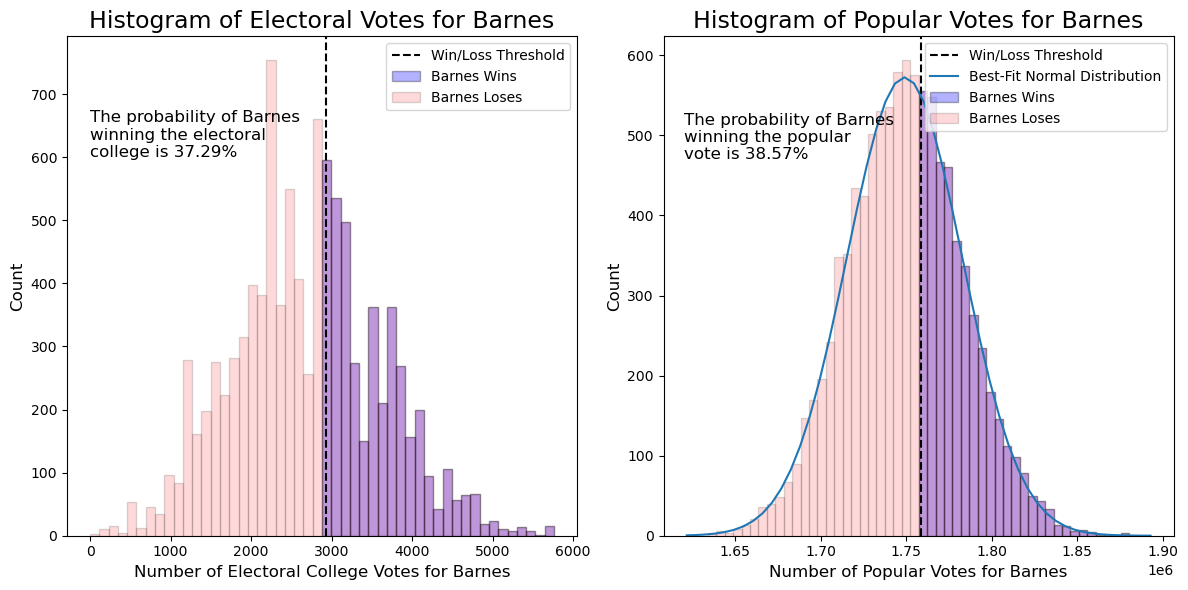

In [627]:
plt.figure(figsize = (12,6))
# electoral votes
EC_counts, EC_centers, EC_width = hist_data(electoral_votes_results, 50)
plt.subplot(1,2,1)
plt.bar(EC_centers[EC_centers > EC_vote_threshold], EC_counts[EC_centers > EC_vote_threshold], 
        width=EC_width, color='b', edgecolor='k', alpha=0.3, label='Barnes Wins')
plt.bar(EC_centers, EC_counts, width=EC_width, color='r', edgecolor='k', label='Barnes Loses', alpha=0.15)
plt.axvline(x=EC_vote_threshold, color='k', linestyle='--', label='Win/Loss Threshold')
plt.xlabel("Number of Electoral College Votes for Barnes", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Histogram of Electoral Votes for Barnes", size = 17)
plt.text(0, 600, f'The probability of Barnes \nwinning the electoral \ncollege is {num_Barnes_wins_EC / 100}%', size=12)
plt.legend()

# popular votes
pop_counts, pop_centers, pop_width = hist_data(popular_votes_results, 50)
plt.subplot(1,2,2)
plt.bar(pop_centers[pop_centers > average_pop_vote_threshold], pop_counts[pop_centers > average_pop_vote_threshold], 
        width=pop_width, color='b', edgecolor='k', alpha=0.3, label='Barnes Wins')
plt.bar(pop_centers, pop_counts, width=pop_width, color='r', edgecolor='k', label='Barnes Loses', alpha=0.15)
plt.axvline(x=average_pop_vote_threshold, color='k', linestyle='--', label='Win/Loss Threshold')
plt.xlabel("Number of Popular Votes for Barnes", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Histogram of Popular Votes for Barnes", size = 17)
plt.text(1620000, 470, f'The probability of Barnes \nwinning the popular \nvote is {num_Barnes_wins_pop / 100}%', size=12)
plt.legend()
# plot best-fit normal distribution on popular vote
mean, std = norm.fit(popular_votes_results)
x_min, x_max = plt.xlim() 
x = np.linspace(x_min, x_max, 50)
vertical_scale_value = 48500000
p = vertical_scale_value * norm.pdf(x, mean, std)
plt.plot(x,p, label="Best-Fit Normal Distribution")
plt.legend()
plt.tight_layout()

#compute probability of winning electoral college
print(f'The overall probability of Barnes winning the election is {num_Barnes_wins_EC / 100}%')